In [114]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
data = pd.read_excel("/content/drive/MyDrive/Veloso/baseEnade17_Sistemas.xlsx")

In [116]:
data.head()

,ID,MODALIDADE,IDADE,SEXO,TURNO,NOTA_GERAL,NOTA-FORM_GER,NOTA_COMPESPE,HorasEst,CategoriaAdm
0,1,1,21,M,4,25.1,49.3,17.0,0.0,Privada
1,2,0,31,M,3,44.3,74.2,34.3,0.0,Privada
2,3,1,22,M,4,54.9,30.0,63.2,0.0,Privada
3,4,1,27,M,4,55.3,42.5,59.5,0.0,Publica
4,5,1,28,M,4,73.2,63.7,76.3,0.0,Publica


In [117]:
data.describe()

,ID,MODALIDADE,IDADE,TURNO,NOTA_GERAL,NOTA-FORM_GER,NOTA_COMPESPE,HorasEst
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,63.000000,0.848000,28.528000,3.240000,38.880800,42.941600,37.512800,6.344000
std,36.228442,0.360466,8.391217,1.180487,13.190519,21.174556,14.009766,4.917634
min,1.000000,0.000000,19.000000,1.000000,12.800000,0.000000,12.800000,0.000000
25%,32.000000,1.000000,23.000000,3.000000,30.100000,30.000000,29.800000,2.000000
50%,63.000000,1.000000,26.000000,4.000000,39.600000,45.000000,38.300000,5.500000
75%,94.000000,1.000000,31.000000,4.000000,46.700000,58.700000,46.000000,10.000000
max,125.000000,1.000000,73.000000,4.000000,83.800000,86.300000,87.500000,16.000000


In [118]:
# Fazendo contagem dos nulos e verificando se todos os dados estão com valores preenchidos
data.isna().sum()

ID               0
MODALIDADE       0
IDADE            0
SEXO             0
TURNO            0
NOTA_GERAL       0
NOTA-FORM_GER    0
NOTA_COMPESPE    0
HorasEst         0
CategoriaAdm     0
dtype: int64

In [119]:
# Obtendo um resumo conciso do dataframe. Usar a função info para obter uma visão geral rápida do conjunto de dados.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             125 non-null    int64  
 1   MODALIDADE     125 non-null    int64  
 2   IDADE          125 non-null    int64  
 3   SEXO           125 non-null    object 
 4   TURNO          125 non-null    int64  
 5   NOTA_GERAL     125 non-null    float64
 6   NOTA-FORM_GER  125 non-null    float64
 7   NOTA_COMPESPE  125 non-null    float64
 8   HorasEst       125 non-null    float64
 9   CategoriaAdm   125 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 9.9+ KB


In [120]:
data.sort_values(by=['SEXO', 'TURNO', 'MODALIDADE', 'CategoriaAdm'])

,ID,MODALIDADE,IDADE,SEXO,TURNO,NOTA_GERAL,NOTA-FORM_GER,NOTA_COMPESPE,HorasEst,CategoriaAdm
100,101,1,19,F,1,45.1,60.9,39.8,10.0,Privada
109,110,1,22,F,1,26.1,15.0,29.8,16.0,Privada
15,16,1,24,F,1,29.9,58.7,20.3,2.0,Publica
77,78,1,20,F,1,46.7,53.3,44.5,5.5,Publica
99,100,1,34,F,1,45.0,39.4,46.8,10.0,Publica
...,...,...,...,...,...,...,...,...,...,...
104,105,1,26,M,4,55.9,30.0,64.5,10.0,Publica
106,107,1,41,M,4,83.8,72.6,87.5,10.0,Publica
114,115,1,34,M,4,34.3,22.4,38.3,16.0,Publica
123,124,1,36,M,4,54.3,70.9,48.7,16.0,Publica


In [121]:
data.dtypes

ID                 int64
MODALIDADE         int64
IDADE              int64
SEXO              object
TURNO              int64
NOTA_GERAL       float64
NOTA-FORM_GER    float64
NOTA_COMPESPE    float64
HorasEst         float64
CategoriaAdm      object
dtype: object

In [122]:
data_crosstab = pd.crosstab(data['NOTA_GERAL'],
                            data['HorasEst'],
                               margins = False)
print(data_crosstab)

HorasEst    0.0   2.0   5.5   10.0  16.0
NOTA_GERAL                              
12.8           0     1     2     0     0
14.5           0     0     0     1     0
14.6           0     1     0     0     1
15.0           0     0     1     0     0
15.2           0     1     0     0     0
...          ...   ...   ...   ...   ...
59.9           0     0     1     0     0
61.8           0     0     0     1     0
70.7           0     1     0     0     0
73.2           1     0     0     0     0
83.8           0     0     0     1     0

[106 rows x 5 columns]


<Axes: xlabel='NOTA_GERAL', ylabel='Count'>

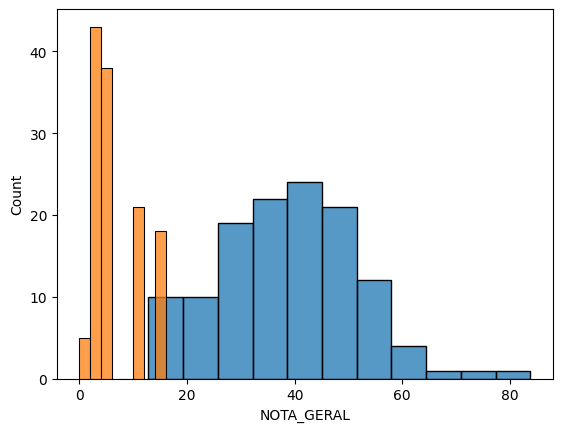

In [123]:
sns.histplot(data.NOTA_GERAL)
sns.histplot(data.HorasEst)

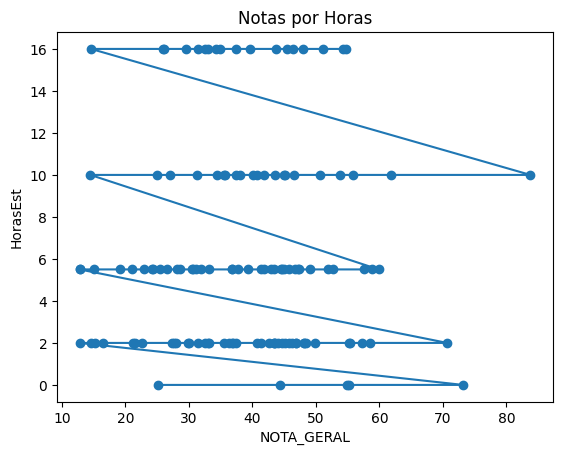

In [124]:
x = data.NOTA_GERAL
y = data.HorasEst
plt.plot(x, y, marker='o')
plt.title('Notas por Horas')
plt.xlabel('NOTA_GERAL')
plt.ylabel('HorasEst')
plt.show()

[Text(0.5, 1.0, 'Gráfico de calor com variáveis numéricas')]

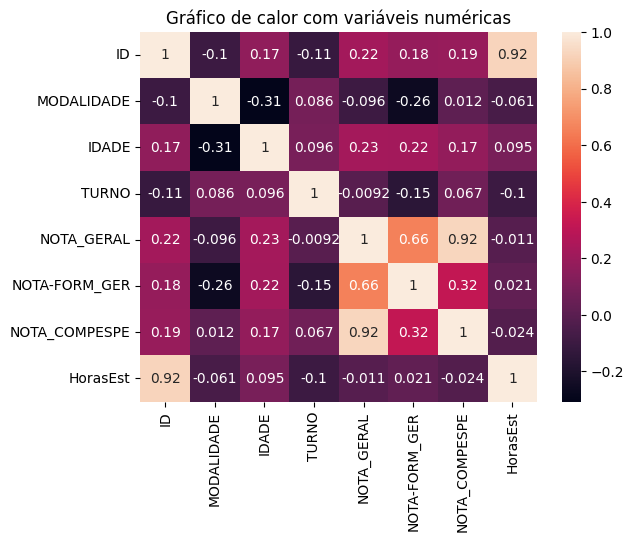

In [125]:
correlacao = data.corr(numeric_only=True)
sns.heatmap(correlacao, annot=True).set(title='Gráfico de calor com variáveis numéricas')

In [126]:
data = pd.DataFrame(data)

media_nota = data["NOTA_GERAL"].mean()
mediana_nota = data["NOTA_GERAL"].median()
desv_pad = data["NOTA_GERAL"].std()
variancia = data["NOTA_GERAL"].var()


print('media:', media_nota)
print('mediana:', mediana_nota)
print('desv_padrao:', desv_pad)
print('variancia: ', variancia)

media: 38.880799999999994
mediana: 39.6
desv_padrao: 13.190518931316515
variancia:  173.98978967741937


In [127]:
data_crosstabela = pd.crosstab(data['NOTA_GERAL'],
                            data['CategoriaAdm'],
                               margins = False)
print(data_crosstabela)

CategoriaAdm  Privada  Publica
NOTA_GERAL                    
12.8                3        0
14.5                1        0
14.6                2        0
15.0                1        0
15.2                1        0
...               ...      ...
59.9                0        1
61.8                1        0
70.7                1        0
73.2                0        1
83.8                0        1

[106 rows x 2 columns]


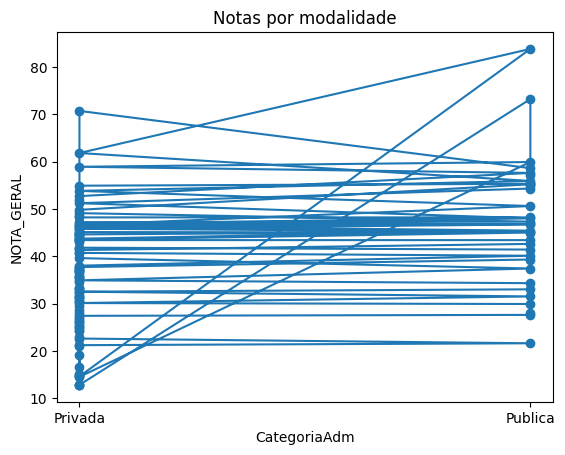

In [128]:
x = data.CategoriaAdm
y = data.NOTA_GERAL
plt.plot(x, y, marker='o')
plt.title('Notas por modalidade')
plt.xlabel('CategoriaAdm')
plt.ylabel('NOTA_GERAL')
plt.show()

In [129]:
data['NOTA_GERAL'].describe()

count    125.000000
mean      38.880800
std       13.190519
min       12.800000
25%       30.100000
50%       39.600000
75%       46.700000
max       83.800000
Name: NOTA_GERAL, dtype: float64

In [143]:
#Transformando Publico para 0 e Privado para 1
data['CategoriaAdm'] = data['CategoriaAdm'].replace({'Publica': '0', 'Privada': '1'})

In [145]:
data.head()

,ID,MODALIDADE,IDADE,SEXO,TURNO,NOTA_GERAL,NOTA-FORM_GER,NOTA_COMPESPE,HorasEst,CategoriaAdm
0,1,1,21,M,4,25.1,49.3,17.0,0.0,1
1,2,0,31,M,3,44.3,74.2,34.3,0.0,1
2,3,1,22,M,4,54.9,30.0,63.2,0.0,1
3,4,1,27,M,4,55.3,42.5,59.5,0.0,0
4,5,1,28,M,4,73.2,63.7,76.3,0.0,0


In [150]:
media_categoria = data.groupby('CategoriaAdm')['NOTA_GERAL'].mean()
mediana_categoria = data.groupby('CategoriaAdm')['NOTA_GERAL'].median()
desvio_categoria = data.groupby('CategoriaAdm')['NOTA_GERAL'].std()
variacao_categoria = data.groupby('CategoriaAdm')['NOTA_GERAL'].var()
print('0 é o ensino público e 1 é o ensino privado:', media_categoria)
print(mediana_categoria)
print(desvio_categoria)
print(variacao_categoria)

0 é o ensino público e 1 é o ensino privado: CategoriaAdm
0    46.897059
1    35.885714
Name: NOTA_GERAL, dtype: float64
CategoriaAdm
0    46.75
1    36.80
Name: NOTA_GERAL, dtype: float64
CategoriaAdm
0    12.931462
1    12.043999
Name: NOTA_GERAL, dtype: float64
CategoriaAdm
0    167.222718
1    145.057905
Name: NOTA_GERAL, dtype: float64


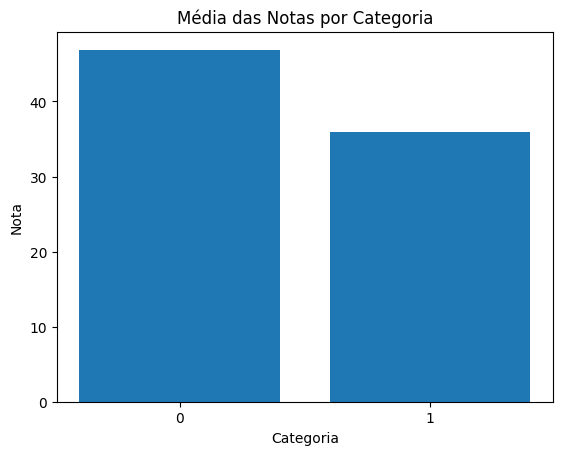

In [157]:
plt.bar(media_categoria.index, media_categoria.values)
plt.xlabel("Categoria")
plt.ylabel("Nota")
plt.title("Média das Notas por Categoria")
plt.show()

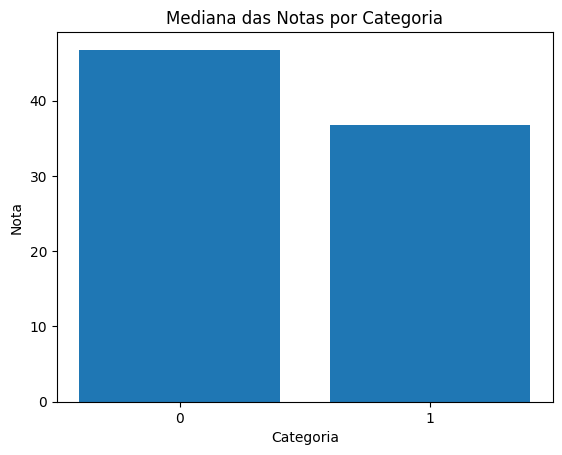

In [158]:
plt.bar(mediana_categoria.index, mediana_categoria.values)
plt.xlabel("Categoria")
plt.ylabel("Nota")
plt.title("Mediana das Notas por Categoria")
plt.show()

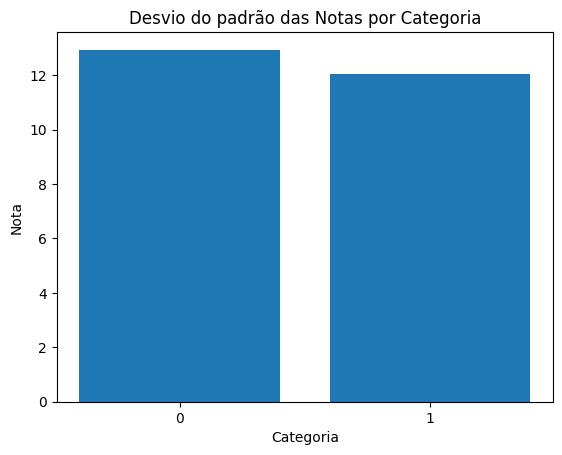

In [159]:
plt.bar(desvio_categoria.index, desvio_categoria.values)
plt.xlabel("Categoria")
plt.ylabel("Nota")
plt.title("Desvio do padrão das Notas por Categoria")
plt.show()

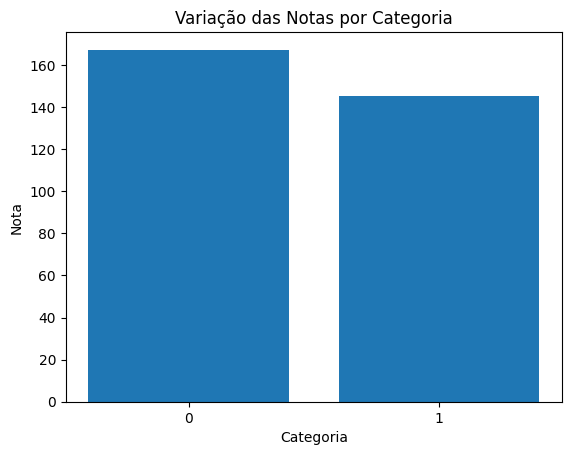

In [160]:
plt.bar(variacao_categoria.index, variacao_categoria.values)
plt.xlabel("Categoria")
plt.ylabel("Nota")
plt.title("Variação das Notas por Categoria")
plt.show()